<a href="https://colab.research.google.com/github/DanielMesaB/Integracion-y-prospectiva-de-datos-2025-01/blob/main/Caracterizaci%C3%B3n_VA_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Caracterización experimental de variables **
0. Cargar las librerias de trabajo


In [1]:
import numpy as np       # Funciones númericas
import matplotlib.pyplot as plt
import pandas as pd      # Comunicación con el excel
import seaborn as sns    # Libreria para la graficas de distribuciones

#Para carga automatica de los datos
from google.colab import drive  # Cargar datos desde el drive automática
drive.mount ('/content/drive')  #Conecta el drive al colab

Mounted at /content/drive


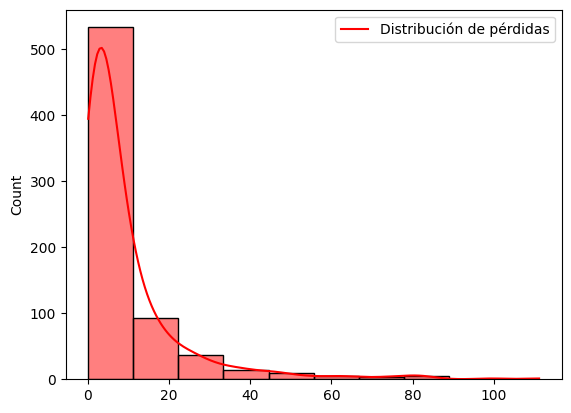

In [2]:
nxl='/content/drive/MyDrive/FALLASOFICIAL.xlsx'
XDB=pd.read_excel(nxl) # Si deseo elegir una hoja en especifico es con sheet:name=,,, recordar que arraanca desde 0

XDB.dropna()
XDB.head(100) # Mostrar los primeros 100 datos


# Tomamos las variables de interés
Xev=XDB.iloc[:,3] # Variables eventos semanales
Xsev=XDB.iloc[:,4] # Pérdidas promedio por evento
LDA=np.multiply(Xev,Xsev)

#Graficamos la distribución de las pérdidas
plt.figure()
sns.histplot(LDA,kde=True, bins=10, color='Red')
#bins quiere decir que estoy agrupando los datos en 10 intervalos
plt.legend(['Distribución de pérdidas'])
#plt.figure(figsize=(10000,6))
plt.show()


2. Caracterización de la distribución de las pérdidas

In [10]:
counts,bin_edges=np.histogram(LDA,bins=10)
print("Los datos por intervalo son: \n",counts) #Cuantos datos hay por intervalo
print("Los limites de los intervalos son: \n",bin_edges) #Limites de los intervalos

#1. Los valores centrales - marcas de clase
mc=(bin_edges[:-1]+bin_edges[1:])/2
#Limites inferiores bin_edges [:-1]
#Limites superiores bin_edges [1:]
print("Los valores centrales de las clases son: \n",mc)


#Cuantos datos hay por intervalo
fp=counts/sum(counts)
print("Los datos por intervalo son: \n", fp)

#2. Se procede con el calculo de las medidas de tendencia central ( Media, Varianza, Coeficiente de asimetria, Kurtosis )
u=np.sum(np.multiply(mc,fp))
print("La media de los datos es:", u)

#3. Desviación - Estandar ( Varianza )
var=np.sum(np.multiply((mc-u)**2, fp)) # Suma producto del excel
print("La varianza de los datos es:", var)
std=np.sqrt(var)
print("La desviación estandar de los datos es:",std)

#4. Coeficiente de asimetria
cas=np.sum(np.multiply(((mc-u)/std)**3, fp))
print("El coeficiente de asimetria de los datos es:",cas)

#5. Coeficiente de kurtosis
ck=np.sum(np.multiply(((mc-u)/std)**4, fp))
ck=ck-3
print("El coeficiente de kurtosis de los datos es:",ck)

Los datos por intervalo son: 
 [744 153  47  15  11   2   7  11   3   7]
Los limites de los intervalos son: 
 [ 0.1796  10.10124 20.02288 29.94452 39.86616 49.7878  59.70944 69.63108
 79.55272 89.47436 99.396  ]
Los valores centrales de las clases son: 
 [ 5.14042 15.06206 24.9837  34.90534 44.82698 54.74862 64.67026 74.5919
 84.51354 94.43518]
Los datos por intervalo son: 
 [0.744 0.153 0.047 0.015 0.011 0.002 0.007 0.011 0.003 0.007]
La media de los datos es: 10.617165280000002
La varianza de los datos es: 191.6897546701769
La desviación estandar de los datos es: 13.845206920453624
El coeficiente de asimetria de los datos es: 3.8342591770784185
El coeficiente de kurtosis de los datos es: 16.310778017836522


**Analisis de resultados**
En la base dd datos se cuenta con un total de 701 registrs de eventos de pérdida asociados con las operaciones a traves de canales electronicos de una FINTECH.
Estos registros nos arrojan como resultado una confiabilidad en la estimación de los estadisticos del 99%, de acuerdo con la teoria de los percentiles.

En a grafica anterior, podems observar que la distribución presenta estructura de cola larga, esto promovido por un coeficiente de asimetria positivo aproximadamente de  (3,348), y un coeficiente kurtosis aproximadamente de 15 unidades, lo que indica que la mayoria de los datos se encuentran muy concentrados alrededor de la media, en un 76% aproximadamente.
Esta estructura muestra que los eventos de pérdida extremos son muy escasos, lo que indica una baja exposición al riesgo.

3. Se procede con el muestreo de la variable de pérdidas

El coeficiente de asimetria de los datos es:
El coeficiente de asimetria de los datos es:
Variación coeficeinte de asimetria de los datos es: [-0.04076767]
Variación coeficeinte de asimetria de los datos es: [0.00460019]


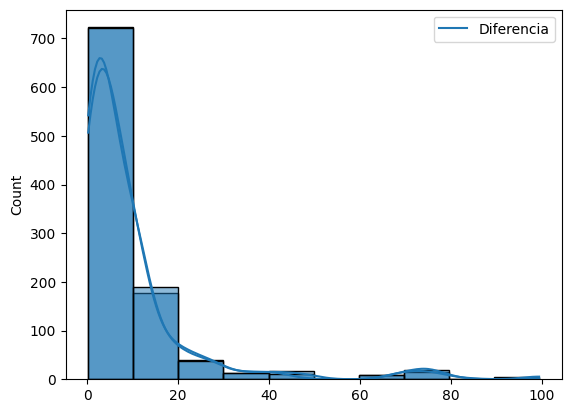

In [28]:
from scipy.stats import skew,kurtosis
#0. Preparar la variable para el muestreo
LDAdf=pd.DataFrame(LDA)

 #1. Se procede con el muestreo
LDA=LDAdf.sample(n=1000,replace=True)
casd=skew(LDAs)
print ("El coeficiente de asimetria de los datos es:")

ckd=kurtosis(LDAs)
ckd=ckd-3
print ("El coeficiente de asimetria de los datos es:")

pvcas=(cas-casd)/cas
print("Variación coeficeinte de asimetria de los datos es:", pvcas )
LDAs=LDAdf.sample(n=1000,replace=True)

pvkd=(ck-ckd)/ck
print("Variación coeficeinte de asimetria de los datos es:", pvkd )



#Se procede con la grafica de las perdidas

plt.figure
sns.histplot(LDA,kde=True,bins=10, color='Pink')
sns.histplot(LDAs,kde=True,bins=10, color='green')
plt.legend(['Diferencia'])
plt.show()



4. Mapeo de la distribución de probabilidad

In [27]:
if abs(cas)<0.5 and abs(ck)<0.5:
  print("Posible distribución normal")

elif cas >0 and ck > 3:
  if ck>=8:
    print("Posible distribución Exponencial")
  elif ck>=6:
    print("Posible distribución Gamma")
  else:
    print("Posible distribución Weibull")

elif cas<0 and ck<3:
  print("Posible distribución Beta")
elif ck <3:
  print("Posible distribución Uniforme")

else:
  print("No se pudo identificar la distribución")

if cas> 0 and abs (ck ) > 8:

    print("Posible distribución exponencial")

elif kurtosis >=6:
  print("Posible distribución Gamma")




Posible distribución Exponencial
Posible distribución exponencial


** Análisis de Resultados **
El número de datos disponibles para este análisis fueron en total 701 datos, lo que lo ubica en una confiabilidad del 99%. Para incrementar esta confiabilidad se procedio con un muestreo basado en el método de monte carlo ( giro de la ruleta - cargada ) logrando en muchos casos coeficientes de curtosis y coeficientes de asimetria por debajo del 5% y coeficiente de curtosis del 15%, a diferencia, del metodo sampling, que utiliza la libreria pandas, los cuales tuvieron variaciones mayores a estos porcentajes %.
El método de montecarlo asegura variaciones mucho más bajas en estos coeficientes.

